In [1]:
import matplotlib.pyplot as plt
import polars as pl
import seaborn as sns

str2date = pl.col("posting_date").str.strptime(pl.Datetime, "%Y-%m-%d %H:%M:%S%z")

train_df = pl.read_csv("../dataset/projectA_vehicle_train.csv").with_columns(
    str2date.alias("posting_date")
)
val_df = pl.read_csv("../dataset/projectA_vehicle_val.csv").with_columns(
    str2date.alias("posting_date")
)
test_df = pl.read_csv("../dataset/projectA_vehicle_test.csv").with_columns(
    str2date.alias("posting_date")
)
train_df

id,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,state,posting_date
i64,i64,f64,str,str,str,str,f64,str,str,str,str,str,"datetime[μs, UTC]"
7308694529,35590,2011.0,"""dodge""","""good""","""8 cylinders""","""gas""",16796.0,"""other""","""rwd""","""coupe""","""green""","""ok""",2021-04-18 13:33:43 UTC
7310447931,10499,2010.0,"""volkswagen""","""good""","""6 cylinders""","""diesel""",119000.0,"""automatic""","""4wd""","""SUV""","""silver""","""nj""",2021-04-21 18:11:24 UTC
7314962211,6900,2012.0,"""nissan""","""good""","""4 cylinders""","""gas""",116000.0,"""automatic""","""fwd""","""SUV""","""grey""","""ny""",2021-04-30 19:16:21 UTC
7315422137,27990,2018.0,"""nissan""","""good""","""6 cylinders""","""gas""",37332.0,"""other""","""4wd""","""pickup""","""silver""","""il""",2021-05-01 18:31:42 UTC
7311229001,14999,2015.0,"""hyundai""","""excellent""","""6 cylinders""","""gas""",96834.0,"""automatic""","""fwd""","""SUV""","""grey""","""az""",2021-04-23 06:19:24 UTC
…,…,…,…,…,…,…,…,…,…,…,…,…,…
7314987109,7500,2009.0,"""mercedes-benz""","""excellent""","""6 cylinders""","""gas""",125000.0,"""automatic""","""rwd""","""coupe""","""black""","""ct""",2021-04-30 20:00:41 UTC
7310439564,100,2011.0,"""jeep""","""excellent""","""6 cylinders""","""gas""",100000.0,"""automatic""","""4wd""","""SUV""","""red""","""oh""",2021-04-21 17:58:22 UTC
7313236397,4495,2014.0,"""chevrolet""","""good""","""4 cylinders""","""gas""",258200.0,"""automatic""","""fwd""","""sedan""","""brown""","""oh""",2021-04-27 11:27:10 UTC


## データ数

In [2]:
for data_type, df in [("train", train_df), ("val", val_df), ("test", test_df)]:
    print(f"{data_type} samples\t: {df.shape[0]:,}")

train samples	: 8,000
val samples	: 1,000
test samples	: 1,000


## データの期間

In [3]:
for data_type, df in [("train", train_df), ("val", val_df), ("test", test_df)]:
    max_date = df.select(pl.col("posting_date").max()).to_numpy()[0][0]
    min_date = df.select(pl.col("posting_date").min()).to_numpy()[0][0]
    print(f"{data_type}\t: {min_date} - {max_date}")

train	: 2021-04-04T09:38:34.000000 - 2021-05-02T15:49:01.000000
val	: 2021-05-02T15:57:15.000000 - 2021-05-03T22:03:54.000000
test	: 2021-05-03T22:10:49.000000 - 2021-05-05T03:31:12.000000


## ハズレ値の分析

### price の外れ値

Text(0.5, 1.0, 'Price Distribution')

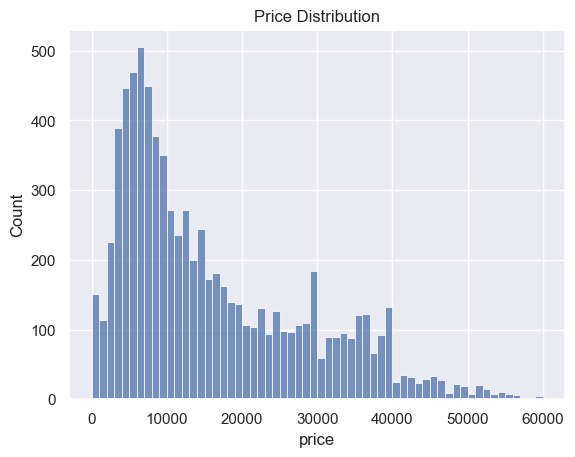

In [4]:
sns.set()
sns.histplot(
    train_df,
    x="price",
    binrange=(0, 60000),
    bins=60,
)
# plt.yscale("log")
plt.title("Price Distribution")

In [5]:
# outlier sample
outlier_id = (
    train_df.sort("price", descending=True).head(1).select("id").to_numpy()[0][0]
)
train_df.sort("price", descending=True).head(1)

id,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,state,posting_date
i64,i64,f64,str,str,str,str,f64,str,str,str,str,str,"datetime[μs, UTC]"
7305265540,1111111111,1999.0,"""ford""","""good""","""8 cylinders""","""diesel""",149000.0,"""automatic""","""rwd""","""pickup""","""white""","""ca""",2021-04-11 18:40:08 UTC


In [6]:
# remove noisy sample
train_df_filtered = train_df.filter(pl.col("id") != outlier_id)
print(f"shape: {train_df_filtered.shape}")

shape: (7999, 14)


### odometer の外れ値

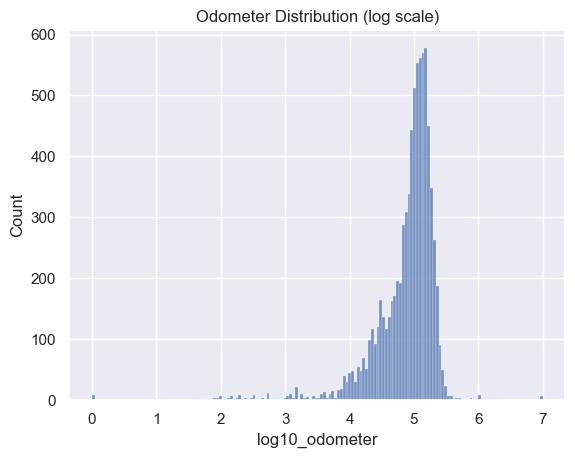

In [7]:
sns.histplot(
    train_df_filtered.select(
        pl.col("odometer").log10().alias("log10_odometer")
    ).to_pandas(),
    x="log10_odometer",
)
plt.title("Odometer Distribution (log scale)")
plt.show()

In [8]:
clip_max = 10**5.5
n_outliers = train_df_filtered.filter(pl.col("odometer") >= clip_max).shape[0]
print(f"Number of outliers: {n_outliers}")

tmp = train_df_filtered.with_columns(
    pl.col("odometer").clip(0, clip_max).alias("odometer")  # clip odometer values
)

Number of outliers: 51


## 外れ値除去したデータの pairplot

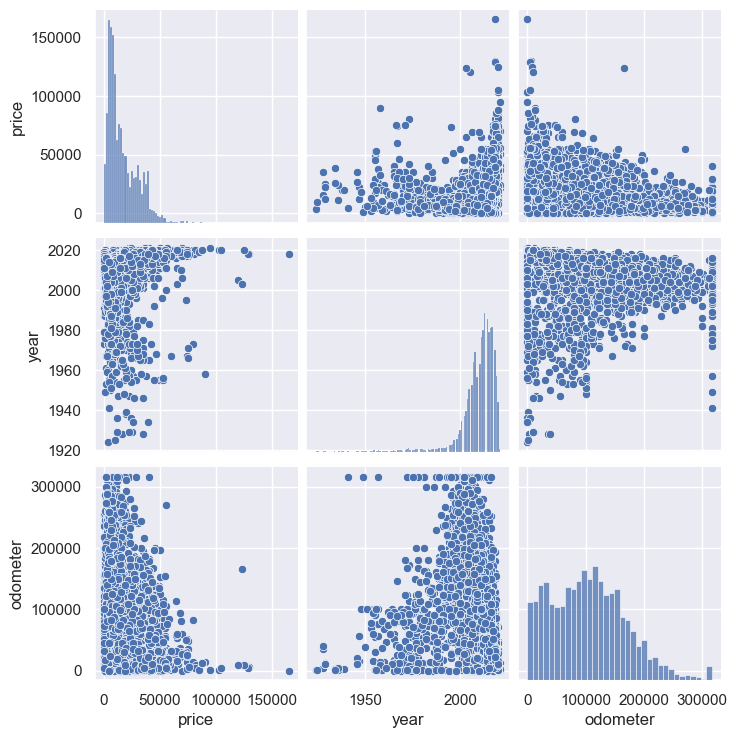

In [9]:
sns.pairplot(tmp.drop("id").to_pandas())
plt.show()

## カテゴリ変数の分析
one-hotで処理できなさそうな変数:
- manufacture → 上位以外は other にする．高級メーカーのフラグを作る．
- condition → new と like new, salvage と fair を同じカテゴリにまとめる. or 整数値として扱う．
- cylinders →　整数に変換． other は欠損値として扱うか，平均値で埋めるなどの処理をする．
- fuel → gas以外は全て other とする
- type →　上位以外は other でまとめる, or 似たカテゴリをまとめる．
- state →　特徴量として使わない，or 価格が高い state かどうかのフラグにする
- paint_color →　上位以外は other でまとめる

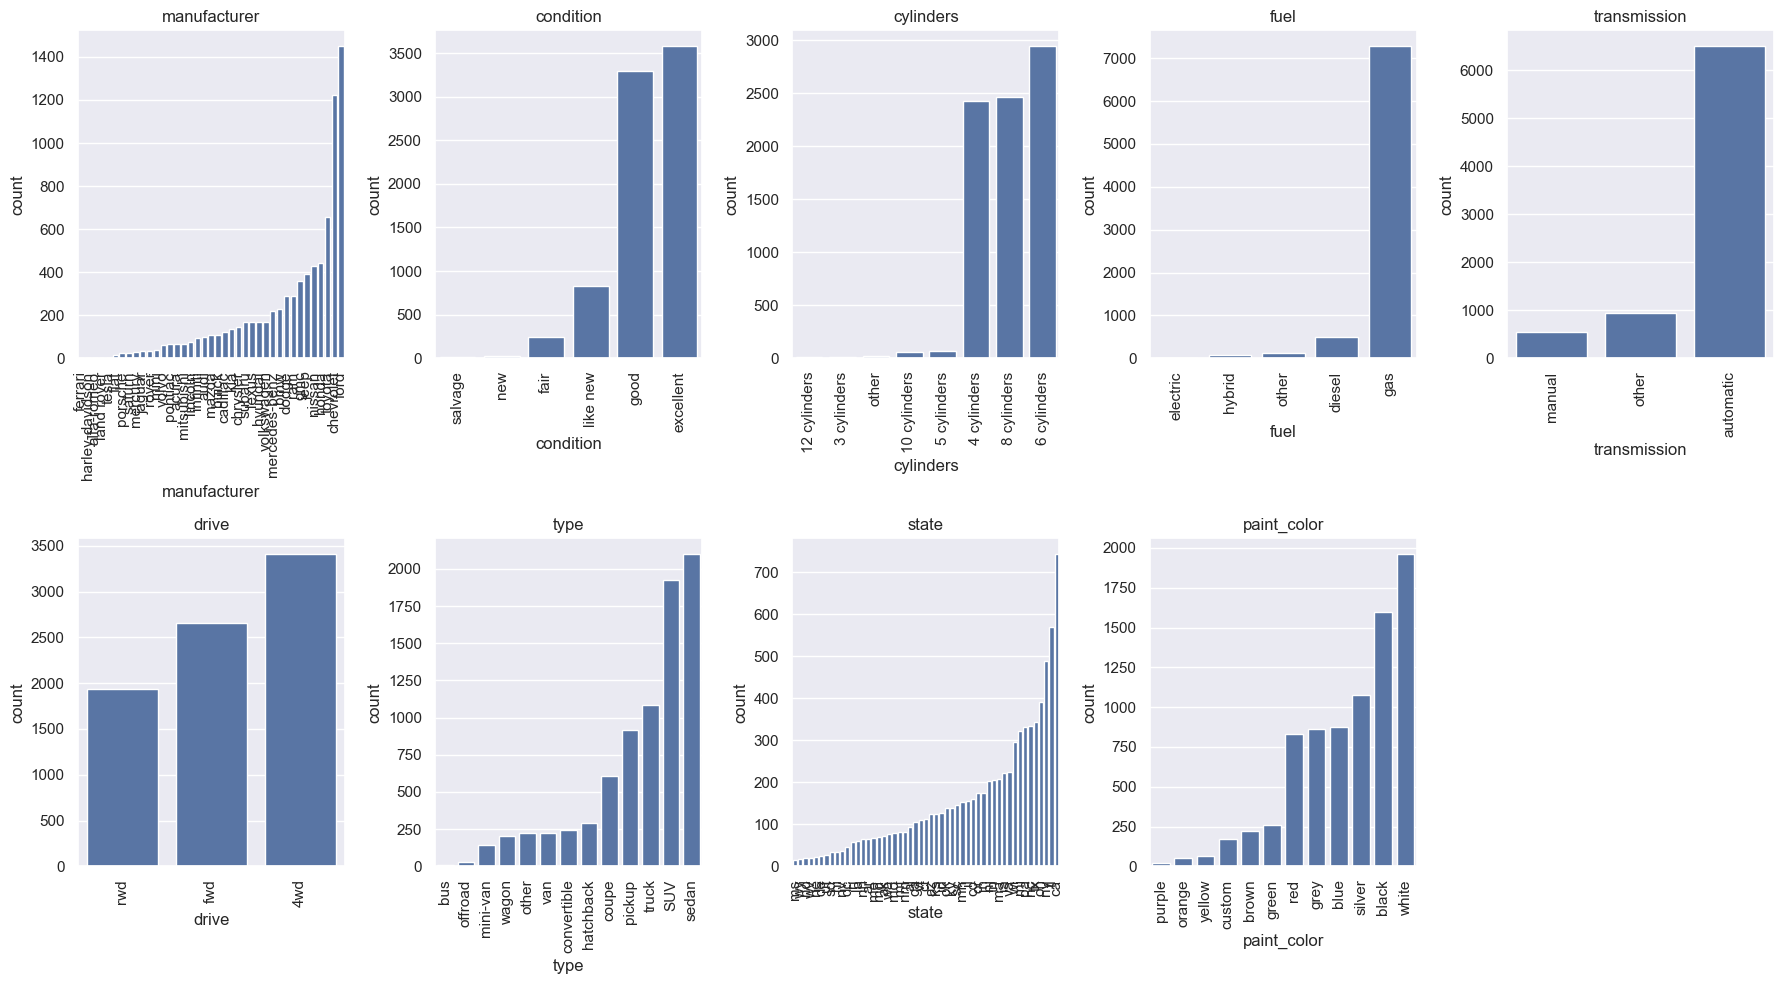

In [10]:
# カテゴリカル変数のリスト
categorical_vars = [
    "manufacturer",
    "condition",
    "cylinders",
    "fuel",
    "transmission",
    "drive",
    "type",
    "state",
    "paint_color",
]
# Create subplot grid
fig, axes = plt.subplots(2, 5, figsize=(18, 10))
axes = axes.ravel()
# Plot each categorical variable
for i, var in enumerate(categorical_vars):
    tmp_df = (
        train_df_filtered.group_by(var)
        .agg(pl.len().alias("count"))
        .sort("count")
        .to_pandas()
    )
    sns.barplot(data=tmp_df, x=var, y="count", ax=axes[i])
    axes[i].set_title(var)
    axes[i].tick_params(axis="x", rotation=90)

# Remove empty subplot
axes[-1].remove()

plt.tight_layout()
plt.show()

### condition の分析

In [11]:
train_df_filtered.group_by("condition").agg(pl.len().alias("count")).sort("count")

condition,count
str,u32
"""salvage""",18
"""new""",31
"""fair""",238
"""like new""",833
"""good""",3296
"""excellent""",3583


In [12]:
train_df_filtered.group_by("condition").agg(
    pl.col("price").mean().alias("mean_price")
).sort("mean_price", descending=True)

condition,mean_price
str,f64
"""new""",25049.096774
"""like new""",19827.893157
"""good""",18426.79824
"""excellent""",15291.203182
"""salvage""",4405.0
"""fair""",4015.546218


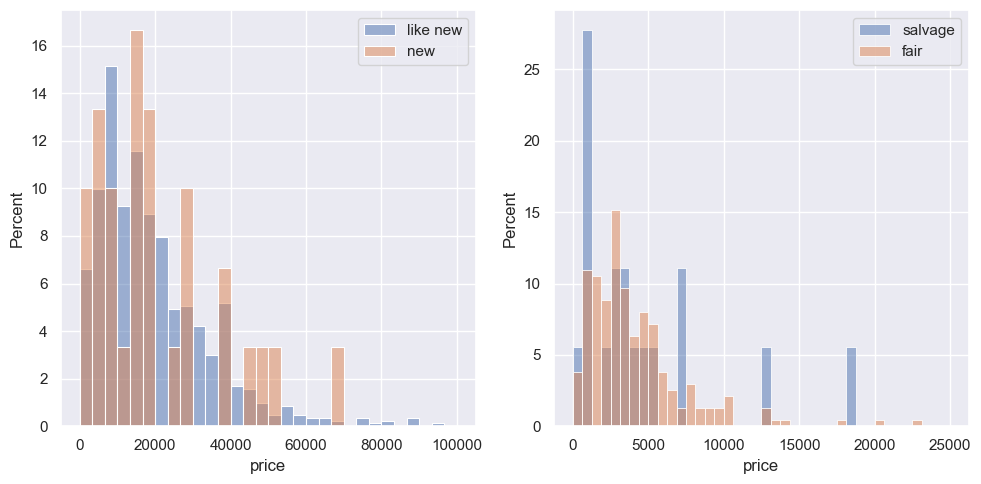

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))


# axes[0]
sns.histplot(
    train_df.filter(pl.col("condition").is_in(["like new"])).to_pandas(),
    x="price",
    stat="percent",
    label="like new",
    binrange=(0, 100_000),
    bins=30,
    alpha=0.5,
    ax=axes[0],
)

sns.histplot(
    train_df.filter(pl.col("condition").is_in(["new"])).to_pandas(),
    x="price",
    stat="percent",
    binrange=(0, 100_000),
    # color="orange",
    bins=30,
    alpha=0.5,
    label="new",
    ax=axes[0],
)

axes[0].legend()


# axes[1]
sns.histplot(
    train_df.filter(pl.col("condition").is_in(["salvage"])).to_pandas(),
    x="price",
    stat="percent",
    label="salvage",
    binrange=(0, 25_000),
    bins=40,
    alpha=0.5,
    ax=axes[1],
)
sns.histplot(
    train_df.filter(pl.col("condition").is_in(["fair"])).to_pandas(),
    x="price",
    stat="percent",
    binrange=(0, 25_000),
    # color="orange",
    bins=40,
    alpha=0.5,
    label="fair",
    ax=axes[1],
)
axes[1].legend()

plt.tight_layout()
plt.show()

### manufacturer の分析

平均的に高値で取引:
- ferrari
- tesla
- ram

一部高価格で取引:
- porsche
- jaguar
- ford
- chevrolet

サンプル数が十分にある:
- ford
- chevrolet
- toyota
- honda
- nissan

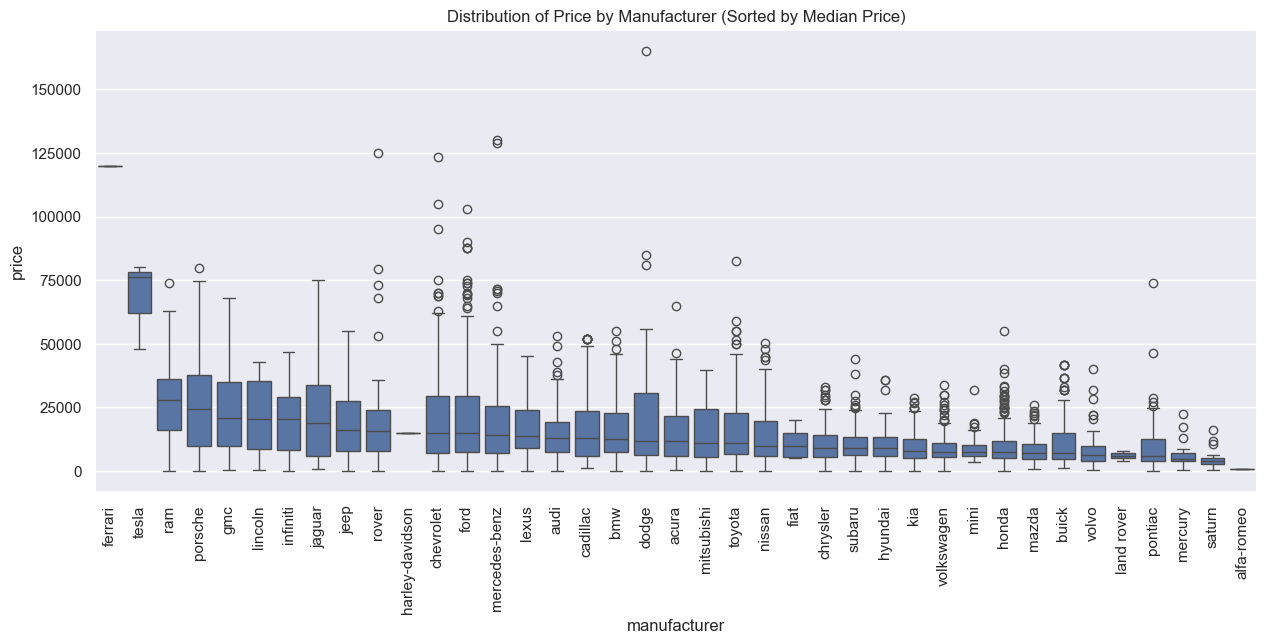

In [14]:
plt.figure(figsize=(15, 6))
sns.boxplot(
    data=train_df_filtered.to_pandas(),
    x="manufacturer",
    y="price",
    order=train_df_filtered.group_by("manufacturer")
    .agg(pl.col("price").median().alias("median_price"))
    .sort("median_price", descending=True)
    .get_column("manufacturer"),
)
plt.xticks(rotation=90)
plt.title("Distribution of Price by Manufacturer (Sorted by Median Price)")
plt.show()


In [15]:
train_df_filtered.group_by("manufacturer").agg(pl.len().alias("count")).sort(
    "count", descending=True
).head(5)

manufacturer,count
str,u32
"""ford""",1451
"""chevrolet""",1225
"""toyota""",657
"""honda""",442
"""nissan""",427


In [16]:
train_manufactures = set(
    train_df.select(pl.col("manufacturer").unique()).to_series().to_list()
)
val_manufactures = set(
    val_df.select(pl.col("manufacturer").unique()).to_series().to_list()
)
test_manufactures = set(
    test_df.select(pl.col("manufacturer").unique()).to_series().to_list()
)

# train manufactures は val manufactures と test manufactures を包含している
print(f"val - train: {val_manufactures - train_manufactures}")
print(f"test - train: {test_manufactures - train_manufactures}")


val - train: set()
test - train: set()


## fuel の分析
- gas, diesel 以外は other でまとめちゃう

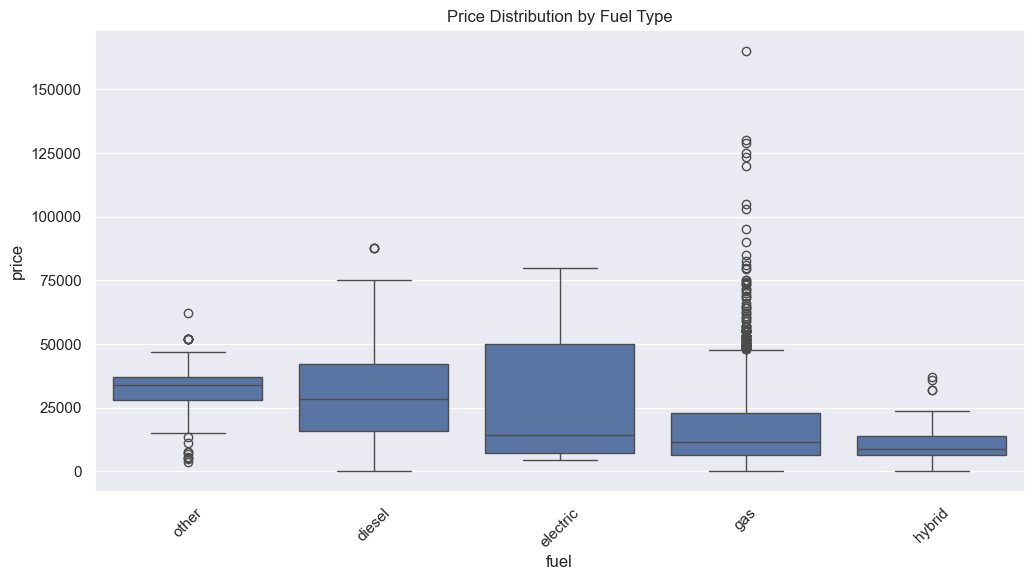

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=train_df_filtered.to_pandas(),
    x="fuel",
    y="price",
    order=train_df_filtered.group_by("fuel")
    .agg(pl.col("price").median().alias("median_price"))
    .sort("median_price", descending=True)
    .get_column("fuel"),
)
plt.xticks(rotation=45)
plt.title("Price Distribution by Fuel Type")
plt.show()

In [18]:
train_df_filtered.group_by("fuel").agg(pl.len().alias("count")).sort(
    "count", descending=True
)

fuel,count
str,u32
"""gas""",7288
"""diesel""",491
"""other""",129
"""hybrid""",82
"""electric""",9


## type の分析
下位の８typeを一つにまとめる．or 価格帯が似たtypeとまとめる

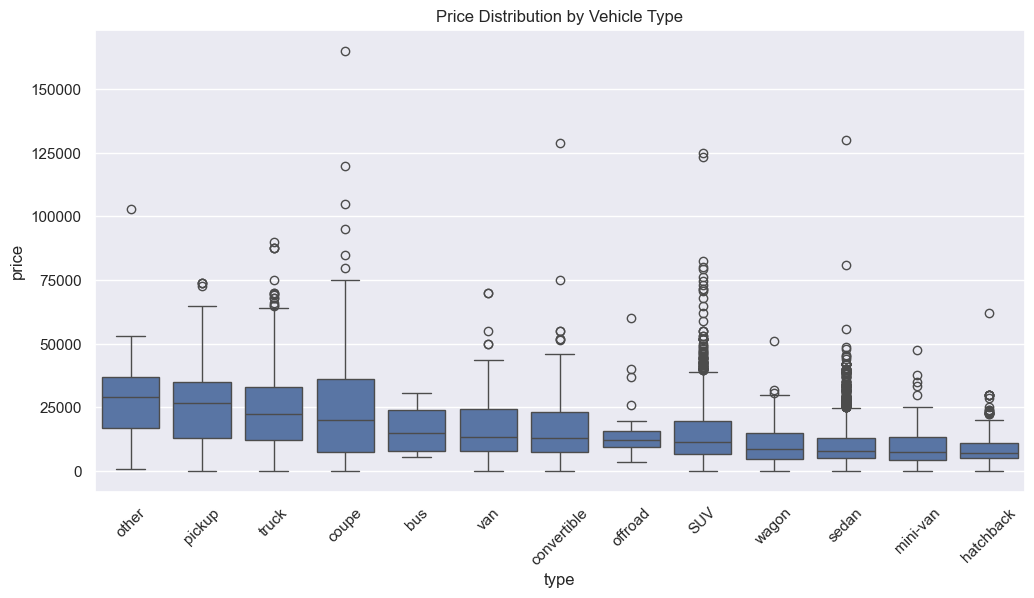

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=train_df_filtered.to_pandas(),
    x="type",
    y="price",
    order=train_df_filtered.group_by("type")
    .agg(pl.col("price").median().alias("median_price"))
    .sort("median_price", descending=True)
    .get_column("type"),
)
plt.xticks(rotation=45)
plt.title("Price Distribution by Vehicle Type")
plt.show()

In [20]:
train_df_filtered.group_by("type").agg(pl.len().alias("count")).sort(
    "count", descending=True
).tail(10)

type,count
str,u32
"""pickup""",916
"""coupe""",605
"""hatchback""",293
"""convertible""",247
"""van""",226
"""other""",221
"""wagon""",202
"""mini-van""",140
"""offroad""",28


## state の分析
- データ数が300未満はother
- 中央値が top 10 のフラグを作る

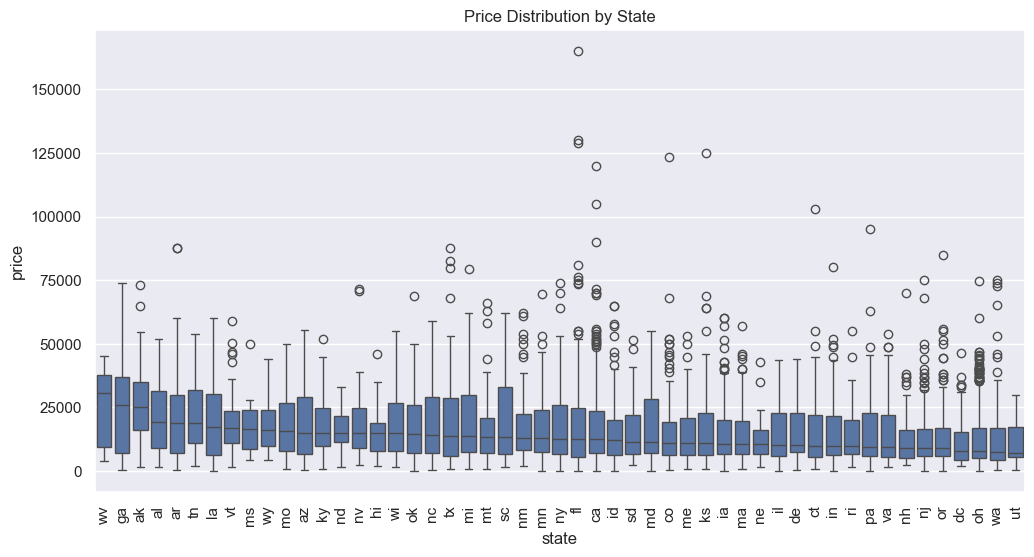

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=train_df_filtered.to_pandas(),
    x="state",
    y="price",
    order=train_df_filtered.group_by("state")
    .agg(pl.col("price").median().alias("median_price"))
    .sort("median_price", descending=True)
    .get_column("state"),
)
plt.xticks(rotation=90)
plt.title("Price Distribution by State")
plt.show()

In [22]:
train_df_filtered.group_by("state").agg(pl.len().alias("count")).sort(
    "count", descending=True
)

state,count
str,u32
"""ca""",743
"""fl""",570
"""ny""",489
"""oh""",391
"""tx""",343
…,…
"""ne""",23
"""wv""",20
"""nd""",19


In [23]:
top10_state = (
    train_df_filtered.group_by("state")
    .agg(pl.col("price").median().alias("median_price"))
    .sort("median_price", descending=True)
    .select(pl.col("state"))
    .to_series()
    .to_list()
)

train_df_filtered.filter(pl.col("state").is_in(top10_state)).group_by("state").agg(
    pl.len().alias("count")
).sort("count", descending=True)

state,count
str,u32
"""ca""",743
"""fl""",570
"""ny""",489
"""oh""",391
"""tx""",343
…,…
"""ne""",23
"""wv""",20
"""nd""",19


## paint_color の分析
- 中央値top5 のフラグ
- データ数 300 未満の色を other とする

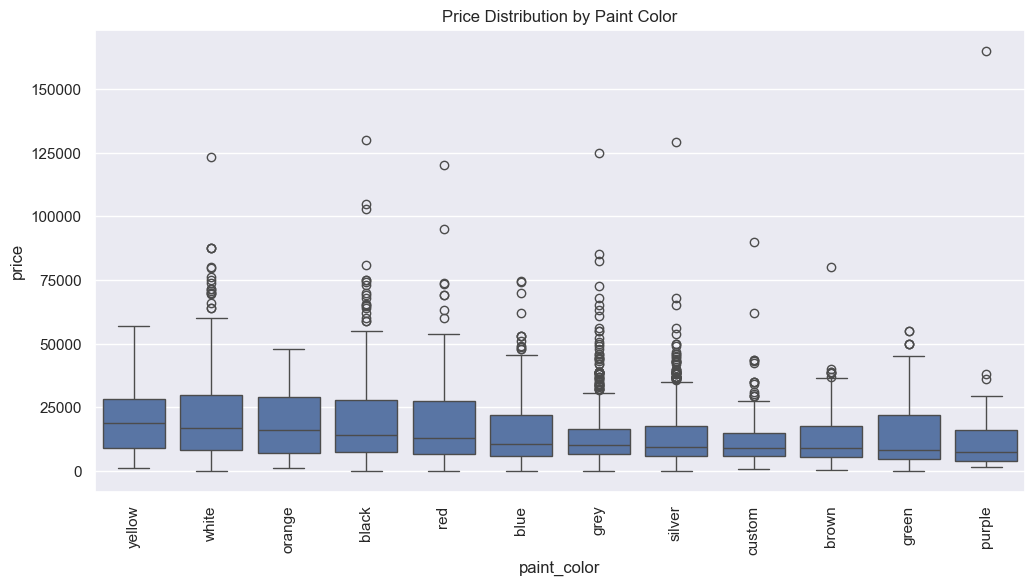

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=train_df_filtered.to_pandas(),
    x="paint_color",
    y="price",
    order=train_df_filtered.group_by("paint_color")
    .agg(pl.col("price").median().alias("median_price"))
    .sort("median_price", descending=True)
    .get_column("paint_color"),
)
plt.xticks(rotation=90)
plt.title("Price Distribution by Paint Color")
plt.show()

In [25]:
train_df_filtered.group_by("paint_color").agg(pl.len().alias("count")).sort(
    "count", descending=True
).head(10)

paint_color,count
str,u32
"""white""",1962
"""black""",1598
"""silver""",1074
"""blue""",875
"""grey""",861
"""red""",830
"""green""",261
"""brown""",223
"""custom""",174


# year の分析
- 1987年から傾向が変わる
- 1975年からプレ値がつきやすい？


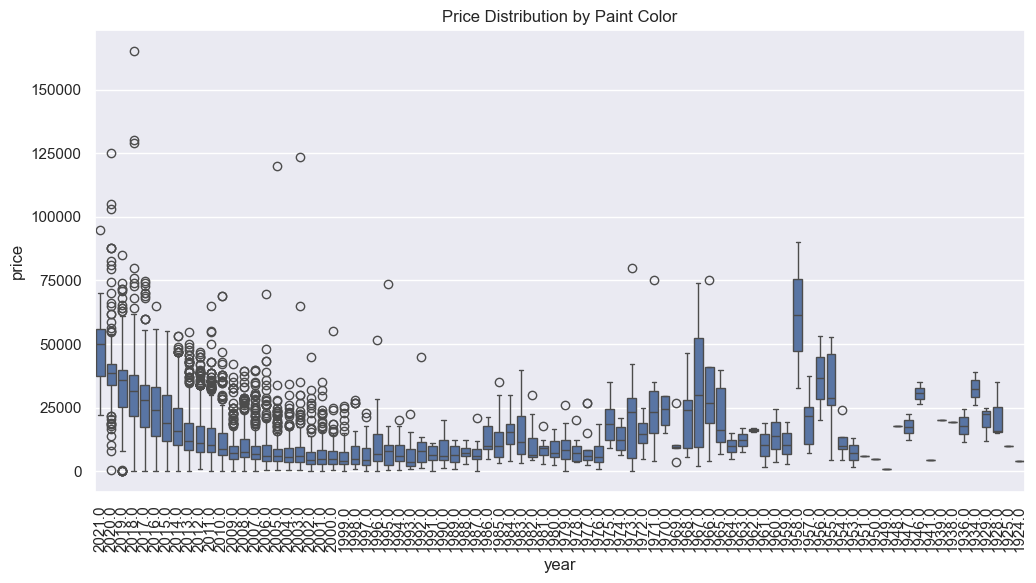

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=train_df_filtered.to_pandas(),
    x="year",
    y="price",
    order=train_df_filtered.group_by("year")
    .agg(pl.col("price").median().alias("median_price"))
    .sort("year", descending=True)
    .get_column("year"),
)
plt.xticks(rotation=90)
plt.title("Price Distribution by Paint Color")
plt.show()